In [2]:
import subprocess
import re
import numpy as np
import matplotlib.pyplot as plt

Pic generator

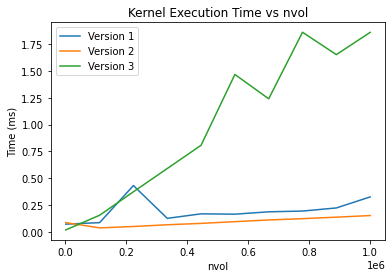

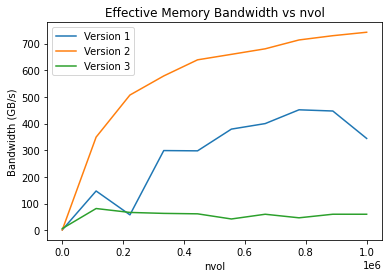

In [4]:
# Define the range of nvol values
nvol_list = list(map(int, np.linspace(1000, 1000000, 10)))

# Prepare storage for results
times_v1, times_v2, times_v3 = [], [], []
bw_v1, bw_v2, bw_v3 = [], [], []

# Regex patterns to extract time and BW
time_pattern = re.compile(r"time = ([0-9.]+) ms")
bw_pattern = re.compile(r"BW = ([0-9.]+) GB/s")

# Run test_norm for each nvol and parse output
for nvol in nvol_list:
    result = subprocess.run(["./test_norm", str(nvol)], capture_output=True, text=True)
    lines = result.stdout.splitlines()
    # Extract for each version
    t1 = bw1 = t2 = bw2 = t3 = bw3 = None
    for line in lines:
        if "Result 1" in line:
            t1 = float(time_pattern.search(line).group(1))
            bw1 = float(bw_pattern.search(line).group(1))
        elif "Result 2" in line:
            t2 = float(time_pattern.search(line).group(1))
            bw2 = float(bw_pattern.search(line).group(1))
        elif "Result 3" in line:
            t3 = float(time_pattern.search(line).group(1))
            bw3 = float(bw_pattern.search(line).group(1))
    times_v1.append(t1)
    times_v2.append(t2)
    times_v3.append(t3)
    bw_v1.append(bw1)
    bw_v2.append(bw2)
    bw_v3.append(bw3)

# Plot Time vs nvol for each version
plt.figure()
plt.plot(nvol_list, times_v1, label='Version 1')
plt.plot(nvol_list, times_v2, label='Version 2')
plt.plot(nvol_list, times_v3, label='Version 3')
plt.xlabel('nvol')
plt.ylabel('Time (ms)')
plt.legend()
plt.title('Kernel Execution Time vs nvol')
plt.show()

# Plot Bandwidth vs nvol for each version
plt.figure()
plt.plot(nvol_list, bw_v1, label='Version 1')
plt.plot(nvol_list, bw_v2, label='Version 2')
plt.plot(nvol_list, bw_v3, label='Version 3')
plt.xlabel('nvol')
plt.ylabel('Bandwidth (GB/s)')
plt.legend()
plt.title('Effective Memory Bandwidth vs nvol')
plt.show()


Estimation of the number

In [3]:
nin  = 12
nvol = 320000
nex  = 1
vecsize = nin * nvol * nex

print("DEBUG:", "nin=", nin, "nvol=", nvol, "nex=", nex, "vecsize=", vecsize)

v = np.arange(vecsize) % 32
v = v * 0.1
print("v.shape =", v.shape)
print("sum(v**2) =", np.sum(v ** 2))


DEBUG: nin= 12 nvol= 320000 nex= 1 vecsize= 3840000
v.shape = (3840000,)
sum(v**2) = 12499200.000000127
